# Assignment Python 1

Nama    : Farah Alysa Putri <br>
Program : Introduction to Python for Data Science <br>
Batch   : 02/001 <br>
Dataset : London Crime 

## Import Libraries

In [133]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt

from wordcloud import WordCloud

import folium

## Data Loading

Pada Assignment 1, dataset yang digunakan adalah dataset London Crime yang merupakan catatan kejahatan di London mencakup laporan kriminal menurut bulan, borough LSOA, dan mayor/minor category dari bulan Januari 2008 hingga Desember 2016. 

In [134]:
# data loading
df1 = pd.read_csv('london_crime_by_lsoa.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [135]:
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Variabel-variabel pada dataset: <br>
•	lsoa_code: this represents a policing area <br>
•	borough: the london borough for which the statistic is related <br>
•	major_category: the major crime category <br>
•	minor_category: the minor crime category <br>
•	value: the count of the crime for that particular borough, in that particular month <br>
•	year: the year of the summary statistic <br>
•	month: the month of the summary statistic <br>

## Preprocessing

In [136]:
# Menghapus data dg value = 0
df1 = df1[df1.value != 0]
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [137]:
# Mereset index
df1 = df1.reset_index(drop=True)
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [138]:
# Shape data frame
df1.shape

(3419099, 7)

Dataset terdiri dari 3419099 baris dan 7 kolom

In [139]:
# Mengganti nama kolom
df1.columns = ['LSOA_Code', 'Borough', 'Major_Category', 'Minor_Category', 'Number_of_Crime', 'Year', 'Month']
df1.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Number_of_Crime,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [140]:
# 5 borough dengan tingkat kejahatan tertinggi
top5 = df1.groupby(['Borough'])['Number_of_Crime'].sum().sort_values(ascending=False).head(5)
top5

Borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: Number_of_Crime, dtype: int64

In [141]:
London_crime = pd.pivot_table(df1, values=['Number_of_Crime'], index=['Year'], columns=['Borough'],aggfunc=np.sum, fill_value=0).reset_index('Year')
London_crime.head()

Year      Number_of_Crime                                      \
Borough       Barking and Dagenham Barnet Bexley  Brent Bromley Camden   
0        2008                17656  23944  15305  23504   24015  32010   
1        2009                17713  23449  14445  24748   21858  31612   
2        2010                17130  23416  13166  25512   19572  31804   
3        2011                16686  24007  11325  27669   19868  33956   
4        2012                15990  23573  11669  26357   19622  31472   

                                       ...                          \
Borough City of London Croydon Ealing  ... Merton Newham Redbridge   
0                    0   29516  28947  ...  13875  29752     20873   
1                    0   29784  28617  ...  13561  28610     20837   
2                    0   29373  31360  ...  13595  30728     20652   
3                   69   29830  29537  ...  13548  27978     21994   
4                  157   30189  28832  ...  12856  30067     21424   

                                                                            \
Borough Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest   
0                      11106     33470  12943         23578          24080   
1                      10618     30623  12240         21959          24761   
2                      10601     31320  12032         23072          24818   
3                      10896     30723  11068         24712          23714   
4                      11168     30737  10948         26784          22647   

                                
Borough Wandsworth Westminster  
0            23330       47846  
1            23021       48456  
2            22815       48116  
3            21384       54243  
4            24457       59226  

[5 rows x 34 columns]

In [142]:
# Menambahkan kolom Total
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head()

Year      Number_of_Crime                                      \
Borough       Barking and Dagenham Barnet Bexley  Brent Bromley Camden   
0        2008                17656  23944  15305  23504   24015  32010   
1        2009                17713  23449  14445  24748   21858  31612   
2        2010                17130  23416  13166  25512   19572  31804   
3        2011                16686  24007  11325  27669   19868  33956   
4        2012                15990  23573  11669  26357   19622  31472   

                                       ...                   \
Borough City of London Croydon Ealing  ... Newham Redbridge   
0                    0   29516  28947  ...  29752     20873   
1                    0   29784  28617  ...  28610     20837   
2                    0   29373  31360  ...  30728     20652   
3                   69   29830  29537  ...  27978     21994   
4                  157   30189  28832  ...  30067     21424   

                                                                            \
Borough Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest   
0                      11106     33470  12943         23578          24080   
1                      10618     30623  12240         21959          24761   
2                      10601     31320  12032         23072          24818   
3                      10896     30723  11068         24712          23714   
4                      11168     30737  10948         26784          22647   

                                 Total  
Borough Wandsworth Westminster          
0            23330       47846  740649  
1            23021       48456  719223  
2            22815       48116  717334  
3            21384       54243  726926  
4            24457       59226  739341  

[5 rows x 35 columns]

In [143]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Year,Number_of_CrimeBarking and Dagenham,Number_of_CrimeBarnet,Number_of_CrimeBexley,Number_of_CrimeBrent,Number_of_CrimeBromley,Number_of_CrimeCamden,Number_of_CrimeCity of London,Number_of_CrimeCroydon,Number_of_CrimeEaling,...,Number_of_CrimeNewham,Number_of_CrimeRedbridge,Number_of_CrimeRichmond upon Thames,Number_of_CrimeSouthwark,Number_of_CrimeSutton,Number_of_CrimeTower Hamlets,Number_of_CrimeWaltham Forest,Number_of_CrimeWandsworth,Number_of_CrimeWestminster,Total
0,2008,17656,23944,15305,23504,24015,32010,0,29516,28947,...,29752,20873,11106,33470,12943,23578,24080,23330,47846,740649
1,2009,17713,23449,14445,24748,21858,31612,0,29784,28617,...,28610,20837,10618,30623,12240,21959,24761,23021,48456,719223
2,2010,17130,23416,13166,25512,19572,31804,0,29373,31360,...,30728,20652,10601,31320,12032,23072,24818,22815,48116,717334
3,2011,16686,24007,11325,27669,19868,33956,69,29830,29537,...,27978,21994,10896,30723,11068,24712,23714,21384,54243,726926
4,2012,15990,23573,11669,26357,19622,31472,157,30189,28832,...,30067,21424,11168,30737,10948,26784,22647,24457,59226,739341


# Area Plot

In [144]:
Top_5 = London_crime.loc[:, ['Year', 'Number_of_CrimeWestminster', 'Number_of_CrimeLambeth', 'Number_of_CrimeSouthwark', 'Number_of_CrimeCamden','Number_of_CrimeNewham']]
Top_5

,Year,Number_of_CrimeWestminster,Number_of_CrimeLambeth,Number_of_CrimeSouthwark,Number_of_CrimeCamden,Number_of_CrimeNewham
0,2008,47846,31717,33470,32010,29752
1,2009,48456,31225,30623,31612,28610
2,2010,48116,31671,31320,31804,30728
3,2011,54243,33224,30723,33956,27978
4,2012,59226,33473,30737,31472,30067
5,2013,53852,31868,31128,28435,27577
6,2014,47564,31765,28912,27198,28005
7,2015,47395,33164,30260,29477,29217
8,2016,48330,34071,31636,29183,30090


In [145]:
# Mengganti nama kolom
Top_5.columns = ['Year', 'Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']
Top_5

,Year,Westminster,Lambeth,Southwark,Camden,Newham
0,2008,47846,31717,33470,32010,29752
1,2009,48456,31225,30623,31612,28610
2,2010,48116,31671,31320,31804,30728
3,2011,54243,33224,30723,33956,27978
4,2012,59226,33473,30737,31472,30067
5,2013,53852,31868,31128,28435,27577
6,2014,47564,31765,28912,27198,28005
7,2015,47395,33164,30260,29477,29217
8,2016,48330,34071,31636,29183,30090


In [146]:
# Menjadikan Year sebagai index
Top_5.set_index("Year", inplace = True)

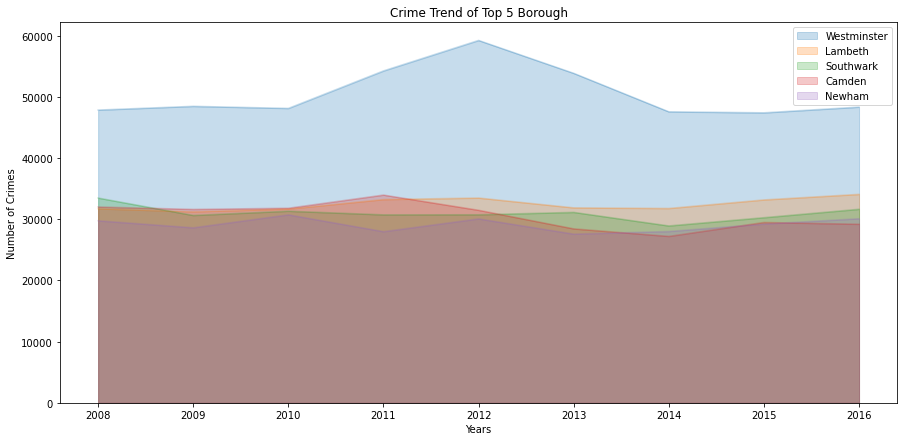

In [147]:
# Membuat Area Plot
# Borough mana yang memiliki tingkat kejahatan tertinggi?
Top_5.index = Top_5.index.map(int) # let's change the index values of df_top5 to type integer for plotting

Top_5.plot(kind='area',
            alpha=0.25,
            stacked=False,
            figsize=(15, 7), # pass a tuple (x, y) size
            )

plt.title('Crime Trend of Top 5 Borough')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

Borough di London dengan tingkat kejahatan tertinggi antara tahun 2008-2016 adalah Westminster Borough, dengan puncak kejahatan tertinggi pada tahun 2012 sebanyak 59226 kejahatan.

# Histogram

In [148]:
Histo = London_crime.set_index('Year').transpose()
Histo

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Number_of_CrimeBarking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Number_of_CrimeBarnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Number_of_CrimeBexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Number_of_CrimeBrent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Number_of_CrimeBromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Number_of_CrimeCamden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Number_of_CrimeCity of London,0,0,0,69,157,110,115,151,178
Number_of_CrimeCroydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Number_of_CrimeEaling,28947,28617,31360,29537,28832,25917,24978,26247,27127
Number_of_CrimeEnfield,21980,21147,20808,21041,21069,21574,21700,22076,22485


In [149]:
Histo[2016].head()

Number_of_CrimeBarking and Dagenham    16741
Number_of_CrimeBarnet                  24684
Number_of_CrimeBexley                  12840
Number_of_CrimeBrent                   26693
Number_of_CrimeBromley                 20164
Name: 2016, dtype: int64

In [150]:
Histogram = Histo.loc[['Number_of_CrimeWestminster', 'Number_of_CrimeLambeth', 'Number_of_CrimeNewham'], [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]].transpose()
Histogram

,Number_of_CrimeWestminster,Number_of_CrimeLambeth,Number_of_CrimeNewham
Year,,,
2008,47846,31717,29752
2009,48456,31225,28610
2010,48116,31671,30728
2011,54243,33224,27978
2012,59226,33473,30067
2013,53852,31868,27577
2014,47564,31765,28005
2015,47395,33164,29217
2016,48330,34071,30090


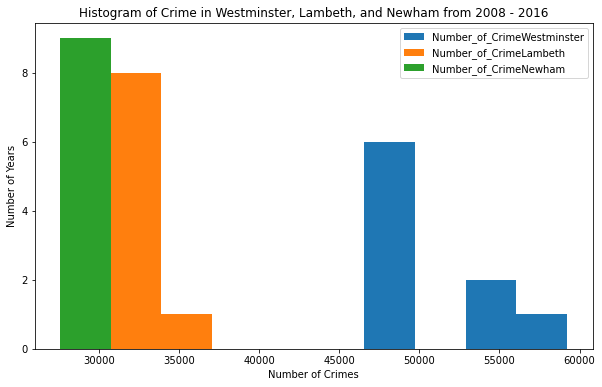

In [151]:
# Membuat Histogram
# Bagaimana frekuensi kejahatan pada borough Westminster, Lambeth, dan Newham tahun 2008 - 2016
Histogram.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Crime in Westminster, Lambeth, and Newham from 2008 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')

plt.show()

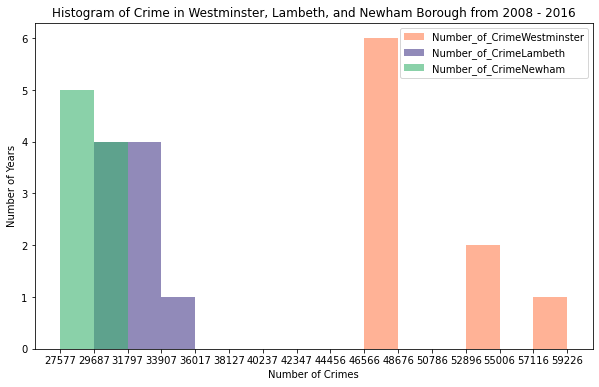

In [152]:
# let's get the x-tick values
count, bin_edges = np.histogram(Histogram, 15)

# un-stacked histogram
Histogram.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Crime in Westminster, Lambeth, and Newham Borough from 2008 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')

plt.show()

a. Jumlah kejahatan di Borough Westminster dengan frekuensi jumlah tahun tertinggi berkisar pada interval 46566 hingga 48676 kejahatan. <br>
b. Jumlah kejahatan di Borough Lambeth dengan frekuensi jumlah tahun tertinggi berkisar pada interval 31797 hingga 33907 kejahatan. <br>
c. Jumlah kejahatan di Borough Newham dengan frekuensi jumlah tahun tertinggi berkisar pada interval 27577 hingga 29687 kejahatan.

# Bar Chart

In [153]:
Bar = Histo.loc['Number_of_CrimeWestminster', [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]]
Bar.head()

Year
2008    47846
2009    48456
2010    48116
2011    54243
2012    59226
Name: Number_of_CrimeWestminster, dtype: int64

In [154]:
# 15 borough dengan tingkat kejahatan tertinggi
top15 = df1.groupby(['Borough'])['Number_of_Crime'].sum().sort_values(ascending=True).tail(15)
top15

Borough
Hillingdon       209680
Barnet           212191
Haringey         213272
Lewisham         215137
Hackney          217119
Brent            227551
Tower Hamlets    228613
Islington        230286
Ealing           251562
Croydon          260294
Newham           262024
Camden           275147
Southwark        278809
Lambeth          292178
Westminster      455028
Name: Number_of_Crime, dtype: int64

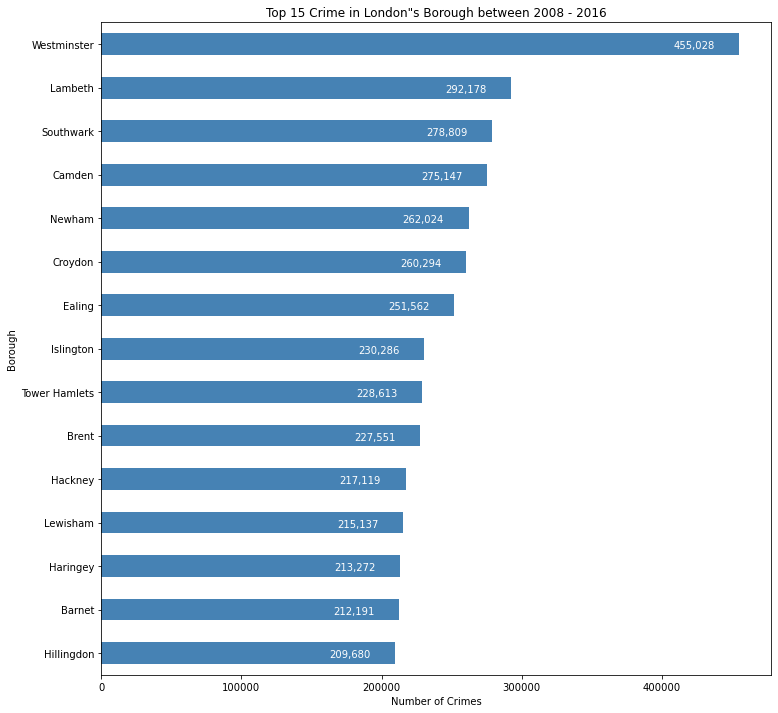

In [155]:
# Membuat Bar Chart
# Berdasarkan 15 borough dengan tingkat kejahatan tertinggi, borough mana yang tingkat kejahatannya paling tinggi dan paling rendah?
top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Crimes')
plt.title('Top 15 Crime in London"s Borough between 2008 - 2016')
for index, value in enumerate(top15): 
    label = format(int(value), ',') # format int with commas
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

Berdasarkan Bar Chart 15 borough di London dengan tingkat kejahatan tertinggi, didapatkan bahwa borough dengan tingkat kejahatan tertinggi antara tahun 2008-2016 adalah Westminster Borough, sedangkan Borough dengan tingkat kejahatan terendah adalah Hillingdon Borough.

# Pie Chart

In [156]:
pc = df1[['Major_Category', 'Number_of_Crime']]
pc

,Major_Category,Number_of_Crime
0,Theft and Handling,1
1,Theft and Handling,1
2,Theft and Handling,2
3,Violence Against the Person,1
4,Criminal Damage,1
...,...,...
3419094,Violence Against the Person,3
3419095,Violence Against the Person,1
3419096,Theft and Handling,1
3419097,Violence Against the Person,2


In [157]:
# Jumlah kejahatan berdasarkan Mayor Kategory
pie = pc.groupby('Major_Category').sum().sort_values(by='Number_of_Crime')
pie

,Number_of_Crime
Major_Category,
Sexual Offences,1273
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Drugs,470765
Criminal Damage,630938
Burglary,754293
Violence Against the Person,1558081
Theft and Handling,2661861


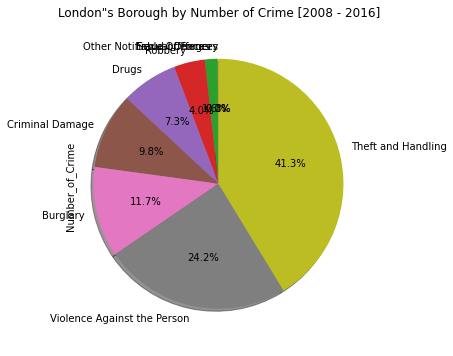

In [158]:
# Membuat Pie Chart
# Jenis kategori kejahatan apa yang paling banyak terjadi di London?
# autopct create %, start angle represent starting point
pie['Number_of_Crime'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('London"s Borough by Number of Crime [2008 - 2016]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

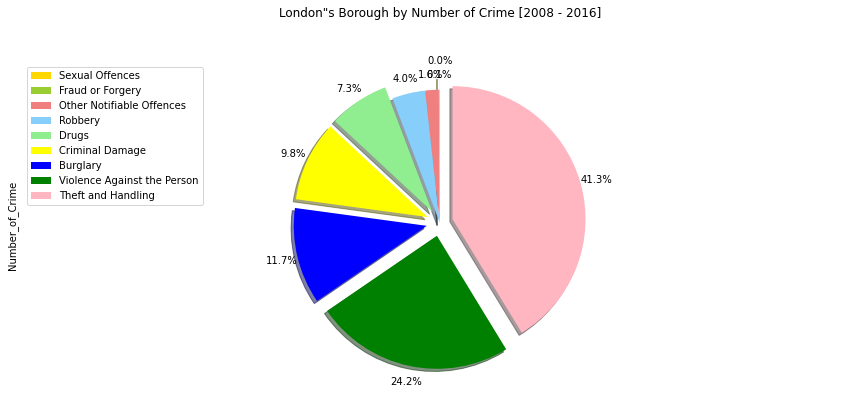

In [159]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'yellow', 'blue', 'green', 'lightpink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

pie['Number_of_Crime'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('London"s Borough by Number of Crime [2008 - 2016]', y=1.12) 

plt.axis('equal')

# add legend
plt.legend(labels=pie.index, loc='upper left') 

plt.show()

Kejahatan yang paling sering terjadi pada Borough di London adalah Theft dan Handling, dengan persentase sebesar 41.3%.

# Box Chart

In [160]:
# Jumlah kejahatan pada borough Newham dan Croydon
df_box = London_crime[['Number_of_CrimeNewham', 'Number_of_CrimeCroydon']]
df_box.head()

,Number_of_CrimeNewham,Number_of_CrimeCroydon
0,29752,29516
1,28610,29784
2,30728,29373
3,27978,29830
4,30067,30189


In [161]:
df_box.describe()

,Number_of_CrimeNewham,Number_of_CrimeCroydon
count,9.000000,9.000000
mean,29113.777778,28921.555556
std,1119.162385,1066.579241
min,27577.000000,27357.000000
25%,28005.000000,28089.000000
50%,29217.000000,29373.000000
75%,30067.000000,29784.000000
max,30728.000000,30189.000000


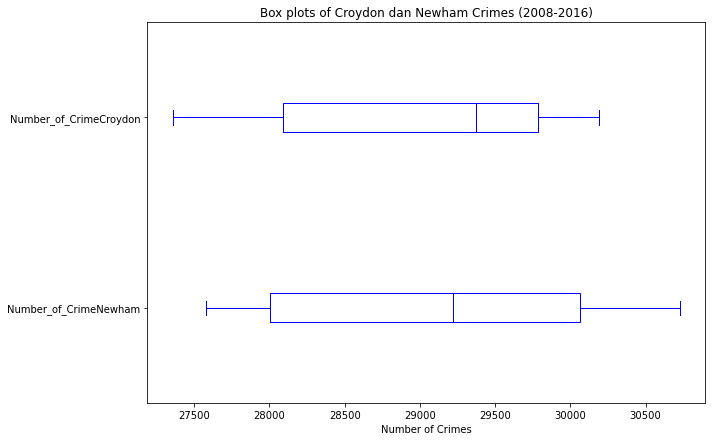

In [162]:
# Membuat Horizontal box plot
df_box.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Croydon dan Newham Crimes (2008-2016)')
plt.xlabel('Number of Crimes')

plt.show()

# Scatter Plot

In [163]:
# Jumlah kejahatan per tahun
scatter = London_crime[['Year', 'Total']].sort_index()
scatter

,Year,Total
0,2008,740649
1,2009,719223
2,2010,717334
3,2011,726926
4,2012,739341
5,2013,688420
6,2014,682197
7,2015,713639
8,2016,738137


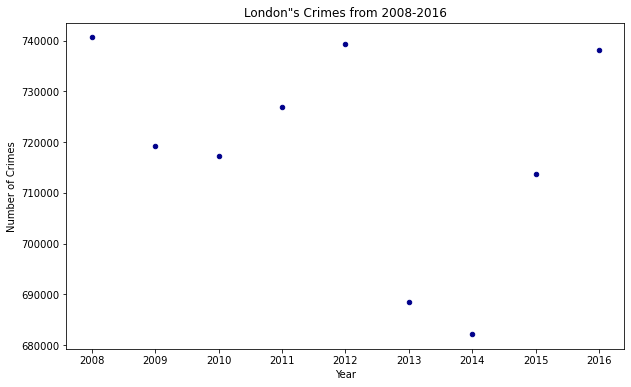

In [164]:
# Membuat Scatterplot
scatter.plot(kind='scatter', x='Year', y='Total', figsize=(10, 6), color='darkblue')
plt.title('London"s Crimes from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

# Word Clouds

In [165]:
# Jumlah kejahatan berdasarkan Major Category
wordcloud = pc[['Major_Category', 'Number_of_Crime']].groupby('Major_Category').sum().sort_values(by='Number_of_Crime')
wordcloud

,Number_of_Crime
Major_Category,
Sexual Offences,1273
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Drugs,470765
Criminal Damage,630938
Burglary,754293
Violence Against the Person,1558081
Theft and Handling,2661861


In [166]:
wordcloud = pc.groupby('Major_Category').sum().sort_values(by='Number_of_Crime')
wordcloud

,Number_of_Crime
Major_Category,
Sexual Offences,1273
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Drugs,470765
Criminal Damage,630938
Burglary,754293
Violence Against the Person,1558081
Theft and Handling,2661861


In [167]:
# Index data
wordcloud.index

Index(['Sexual Offences', 'Fraud or Forgery', 'Other Notifiable Offences',
       'Robbery', 'Drugs', 'Criminal Damage', 'Burglary',
       'Violence Against the Person', 'Theft and Handling'],
      dtype='object', name='Major_Category')

In [168]:
total_crime = wordcloud['Number_of_Crime'].sum()
total_crime

6447758

In [169]:
# Generate text
max_words = 99
word_string = ' '
for country in wordcloud.index.values:
    # check if country's name is a single-word name
    if len(country.join(' ')) == 1:
        repeat_num_times = int(wordcloud.loc[country, 'Number_of_Crime']/float(total_crime)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

' Other Notifiable Offences Robbery Robbery Robbery Drugs Drugs Drugs Drugs Drugs Drugs Drugs Criminal Damage Criminal Damage Criminal Damage Criminal Damage Criminal Damage Criminal Damage Criminal Damage Criminal Damage Criminal Damage Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Theft and Handling 

In [170]:
# Membuat wordcloud
# Kategori kejahatan apa yang paling banyak terjadi di London?
wordcloud = WordCloud(collocations=False, background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


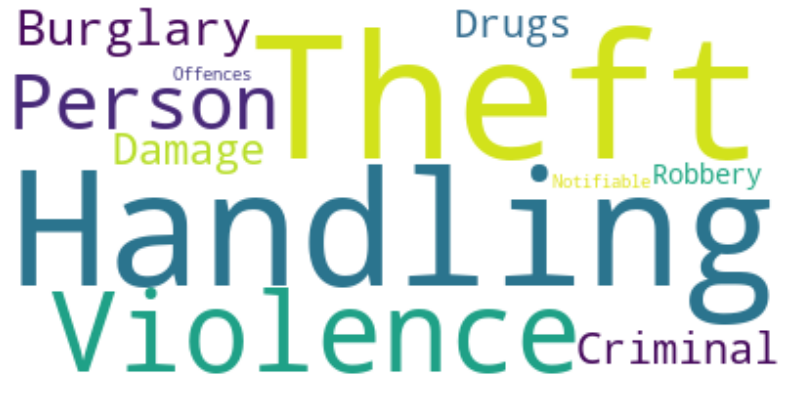

In [171]:
# Display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Kategori kejahatan yang paling sering terjadi pada Borough di London adalah Theft dan Handling

# Folium Maps

In [172]:
# Data loading koordinat borough
df2 = pd.read_csv('D:\STATISTIKA\BISMILLAH\KM\SI\Hacktiv8\Assignment Python\\1\\london_boroughs.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [173]:
df2.head()

,borough,x,y
0,Barking & Dagenham,0.1557,51.5607
1,Barnet,-0.1517,51.6252
2,Bexley,0.1505,51.4549
3,Brent,-0.2817,51.5588
4,Bromley,0.0198,51.4039


In [174]:
# Mengganti nama kolom
df2.columns = ['Borough', 'X', 'Y']
df2.head()

,Borough,X,Y
0,Barking & Dagenham,0.1557,51.5607
1,Barnet,-0.1517,51.6252
2,Bexley,0.1505,51.4549
3,Brent,-0.2817,51.5588
4,Bromley,0.0198,51.4039


In [175]:
# Data jumlah kejahatan
Number_of_crime = df1.groupby(['Borough'], as_index=False).agg({'Number_of_Crime': 'sum'})
Number_of_crime

,Borough,Number_of_Crime
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [176]:
# Menggabungkan dataset
Data_crime_map = pd.merge(df2, Number_of_crime, on='Borough')
Data_crime_map

,Borough,X,Y,Number_of_Crime
0,Barnet,-0.1517,51.6252,212191
1,Bexley,0.1505,51.4549,114136
2,Brent,-0.2817,51.5588,227551
3,Bromley,0.0198,51.4039,184349
4,Camden,-0.1255,51.5290,275147
5,Croydon,-0.0977,51.3714,260294
6,Ealing,-0.3089,51.5130,251562
7,Enfield,-0.0799,51.6538,193880
8,Greenwich,0.0648,51.4892,181568
9,Hackney,-0.0553,51.5450,217119


In [177]:
Data_crime_map.shape

(27, 4)

Dataset terdiri dari 27 baris dan 4 kolom

In [178]:
# Membuat Folium Map
# London latitude and longitude values
latitude = 51.509865
longitude = -0.118092

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# display the map of San Francisco
sanfran_map

In [179]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Data_crime_map.Y, Data_crime_map.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Data_crime_map.Y)
longitudes = list(Data_crime_map.X)
labels = list(Data_crime_map.Borough)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [180]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(Data_crime_map.Y, Data_crime_map.X, Data_crime_map.Number_of_Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map